# Project 2: Ames (Iowa) Housing Price Regression

## Problem Statement

As a researcher in the R&D team for a real estate firm whose main business activity is house flipping and property development which recently expanded into Ames, we were tasked to analyze the housing transaction data in Ames, to come up with recommendations on where the firm can focus its efforts in a bid to increase revenue.  

As the firm primarily engages in house flipping and property development, we will base our recommendations with regards to these activities.  

Additionally as a researcher, our R&D team would also like to find out which modelling approach yields the most accurate predicitions for sale prices.

## Dataset

The datasets used for their project are:
- [Ames Housing Data](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge)  

The dataset used consisted of over 2000 entries with 80 features for properties sold in Ames, Iowa between year 2006 to 2010.

To find out more about the information within the dataset and what each feature represents, you may visit this [site](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data).

## Background

Flipping is a term used to describe purchasing a revenue-generating asset and quickly reselling (or "flipping") it for profit. Within the real estate industry, the term is used by investors to describe the process of buying, rehabbing, and selling properties for profit. In 2017, [207,088](https://www.attomdata.com/news/home-flipping/2017-u-s-home-flipping-report/) houses or condos were flipped in the US, an 11-year high.

Profits from flipping real estate come from either buying low and selling high (often in a rapidly rising market), or buying a house that needs repair and fixing it up before reselling it for a profit ("fix and flip").

Under the "fix and flip" scenario, an investor or flipper will purchase a property at a discount price. The discount may be caused by:

- The property's condition (e.g. the house needs major renovations and/or repairs which the owner either does not want, or cannot afford, to do), or
the owner(s) needing to sell a property quickly (e.g., relocation, divorce, pending foreclosure).
- The investor will then perform necessary renovations and repairs, and attempt to make a profit by selling the house quickly at a higher price.  
 House flippers who manage to find a deeply discounted house in disrepair, can make anywhere from [USD 40K to USD70K](https://morrisinvest.com/blog/2019/4/15/the-truth-about-flipping-houses/?gclid=CjwKCAjwkJj6BRA-EiwA0ZVPVrGS2375XD-hXjQLIAelMNja7R-T_J5Wz5Qh1_clsL0DCyhkG2Qk2hoCtZUQAvD_BwE) in a single transaction.

The "fix and flip" scenario is profitable to investors because the average homebuyer lacks the time and funds to repairs and renovations, so they look for a property that is ready to move into.

## Executive Summary

The study included a detailed look at the various neighborhood of Ames, as well as the different features and conditions relating to each part of the property.

It has been observed that the key features that affect the sale price of a property is overall quality, age, size and the neighborhood that the property is located. The feature that appears to add most value to a property is the overall quality of the house and size of the ground living area. The fact that quality has more correlation than condition is that condition defect progress with age while in contrast a quality property grows with age. While size of property is always one of the factor when it comes to measuring of price, we have observed that the greater the proportion of overall ground living area, the higher the sale price is. However, there's one features that can negatively affect the sale price of a property. In one of the correlation analysis, we saw that an increase in the age of the property leads to drop in sale price.

Homeowners can actually consider furnishing the overall quality and condition of the house before making a sale so that there's a higher probability that it can fetch a higher price. Since the heart of the home lies in the ground living area, it would be good to give a little update on the tiles and wall paint. Quality repairs to the fixtures and plumbing should also take into considerations as quality is one of the top positive correlation to sale price. Moreover if the property is located in areas like NorthRidge Heights and NorthRidge, homeowners can expect a higher sale price as compared to property in the other neighborhood.

It should be noted that this model will not generalize to a certain extent as the model only take into consideration of how property price is valuated in Aimes. The model includes the neighborhoods of Aimes in the modelling process hence it might not be applicable to other county or countries. However, in order to create a generalized model that can be used for any property, more datasets from various countries might be needed in the analysing process.  


### Overview of models:

|Model|Description|Regression Type|Precedent Model|Adj R-square|RMSE|
|-|-|-|-|-|-|
|Model 1|Regression with all regressors|Linear Regression|NA|0.90964|23606|
|Model 2|Regression with all regressors|Ridge|NA|0.90798|23479|
|Model 3|Regression with all regressors|Lasso|NA|0.90925|23344|
|Model 4|Regression with all regressors|ElasticNet|NA|0.90492|24335|  

- Note that Precedent Model indicates the model that the current model is built on top of.

## Contents:
 
- [Data Import & Cleaning](#1.Data-Import-and-Cleaning)
- [Exploratory Data Analysis + Feature Engineering](#2.EDA-&-Feature-Engineering)
- [Data Visualization](#3.Data-Visualization)
- [Data Modelling](#4.Data-Modelling)
- [Conclusions and Recommendations](#5.Conclusions-and-Recommendations)

## 1.Data Import & Cleaning

In [1]:
# Data manipulation imports
import pandas as pd # Version 1.2.4
import numpy as np # Version 1.20.1

# Data Visualization imports
import matplotlib.pyplot as plt # Version 3.3.4
import seaborn as sns # Version 0.11.1
%matplotlib inline

#Stylistic Choice:
plt.style.use('seaborn-pastel')
sns.set_palette('pastel')

# Statistical imports
import scipy.stats as stats # Version 1.6.2

# Modelling imports
# sklearn Version  (0.24.1)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# others
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

In [2]:
#increase display range for easier viewing and EDA
pd.options.display.max_columns = 400
pd.options.display.max_rows = 300

In [3]:
#Function Definitions

def standardize_columns(df):
    #new feature of baths that combines some overlaps in original dataset
    df['baths'] = df['bsmt_full_bath'] + df['full_bath'] + (df['bsmt_half_bath']/2) + (df['half_bath']/2)
    
    #combining basment sq footage
    df['finished_basement_sqft'] = df['bsmtfin_sf_1'] + df['bsmtfin_sf_2']
    
    #to see if age at sale makes any difference
    df['age_ofzz_sale'] = df['yr_sold'] - df['year_built']
    df['age_of_remod'] = df['yr_sold'] - df['year_remod/add']
    #interaction feature b/w quality and living area
    df['overall_qual_x_gr_liv_area'] = df['overall_qual']*df['gr_liv_area']
    
    #dropping now redundant columns
    df.drop(columns=['bsmt_full_bath', 'full_bath',
                     'bsmt_half_bath','half_bath', 
                     'bsmtfin_sf_1', 'bsmtfin_sf_2', 
                     '1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'bsmt_unf_sf' ], inplace=True)
    
    #Reworking street columns to reflect paved or gravel
    df['street'] = df['street'].map({'Pave': 1, 'Grvl': 0})
    
    #Reworking central air as Yes or No
    df['has_central_air'] = df['central_air'].map({'Y': 1, 'N': 0})
    
    #See if a newly renovated property sells more
    df['newly_renovated'] = df['year_remod/add'].map(lambda reno: 1 if reno >= 2007 else 0)
    
    #Easier readability of certain features and values
    df['functionality'] = df['functional'].map({
    'Maj2': 'deducted',
    'Mod': 'deducted',                        
    'Min2':'deducted', 
    'Maj1': 'deducted',
    'Min1': 'deducted',
    'Sev': 'severely_damaged',
    'Sal': 'salvage_only',
    'Typ': 'typical'
    
})
    df['building_type'] = df['bldg_type'].map({
    '2fmCon': "two_family_conversion",
    'Twnhs' : 'townhouse_inside_unit',
    'TwnhsE': 'townhouse_end_unit',
    '1Fam': 'single_family',
    'Duplex': 'duplex'
})

# Creating a function to plot boxplots
def boxplots(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 
    if len(list_of_columns) %2 !=0:
        ax[len(list_of_columns)].set_visible(False)
    for i, column in enumerate(list_of_columns):
        names = dataframe.groupby(column).mean()['saleprice'].sort_values().index
        sns.boxplot(dataframe[column],dataframe['saleprice'],order = names, ax = ax[i]) 
        ax[i].set_title(f' " saleprice" vs "{column}"', fontsize =18)
        ax[i].set_ylabel('Values',fontsize=15)
        ax[i].set_xlabel(column,fontsize=15) 
        ax[i].set_xticklabels(names,rotation=40) 
    plt.tight_layout()
    
def amplify_feature(feature_list):
    list_feat = []
    for x in feature_list:
        train_dummies[x +"3"] = train_dummies[x] * train_dummies[x]
        test_dummies[x + "3"] = test_dummies[x] * test_dummies[x]
        list_feat.append( x + "3")
        list_features= [x + "3" if i== x else i for i in correlated_features]
    return list_feat

In [4]:
# Import data
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
#column names formatting
train.columns = [i.lower().replace(' ','_') for i in train.columns]
test.columns = [i.lower().replace(' ','_') for i in test.columns]

In [5]:
# train.columns

In [6]:
# train.shape

In [7]:
# train.info

In [8]:
# train.describe()

In [9]:
# train.dtypes

In [10]:
# train.head()

In [11]:
# test.columns

In [12]:
# test.shape

In [13]:
# test.info

In [14]:
# test.describe()

In [15]:
# test.dtypes

In [16]:
# test.head()

While both the datasets are very robust, they require cleaning and standardization before we can proceed with any data analysis.

### Data Cleaning 

In [17]:
# train.isnull().sum()[train.isnull().sum()>0]

In [18]:
# test.isnull().sum()[test.isnull().sum()>0]

Based on the data description, there are many columns that containing 'NA' which are not actually missing values. To proceed, numerical features containing 'NA' will be set to 0, and categorical features containing an NA will be set to 'None'

In [19]:
for col in train:
    if type(train[col])== 'int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')

In [20]:
for col in test:
    if type(test[col])== 'int64' or 'float64':
        test[col] = test[col].fillna(value=0)
    else:
        test[col] = test[col].fillna(value='None')

### Identify and drop outliers for selected columns

In [21]:
#identify outlier
# train[train['garage_yr_blt']>2010][['year_built','garage_yr_blt']]

In [22]:
#correct outlier assuming they meant to enter 2007
train.loc[1699,'garage_yr_blt'] = 2007

In [23]:
# identify outliers 
# train[train['total_bsmt_sf']>4000]

In [24]:
#drop outliers
train.drop(train[train['total_bsmt_sf']>3000].index,inplace=True)

In [25]:
#identify outliers
# train[train['lot_area']>60000] 

In [26]:
#drop outliers
train.drop(train[train['lot_area']>60000].index,inplace=True)

In [27]:
#identify outliers
# train[train['totrms_abvgrd']>13]

In [28]:
#drop outliers
train.drop(858,inplace=True)

## 2.EDA & Feature Engineering 

In [29]:
# run function for train / test
standardize_columns(train)
standardize_columns(test)

### Get Dummies to convert Categorical to Numerical

In [30]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [31]:
#filling in missing columns such that they are standardized for both DFs
missing_cols = set(train_dummies.columns ) - set(test_dummies.columns)
for c in missing_cols:
    test_dummies[c] = 0    
test_dummies = test_dummies[train_dummies.columns]

In [32]:
# print(train_dummies.shape)
# print(test_dummies.shape)

In [33]:
# train.head()

In [34]:
# test.head()

In [35]:
# Save values to intermediate file
train.to_csv('../datasets/train_cleaned.csv',index_label=False)
test.to_csv('../datasets/test_cleaned.csv',index_label=False)
train_dummies.to_csv('../datasets/train_dummies_cleaned.csv',index_label=False)
test_dummies.to_csv('../datasets/test_dummies_cleaned.csv',index_label=False)

## 3.Data Visualization

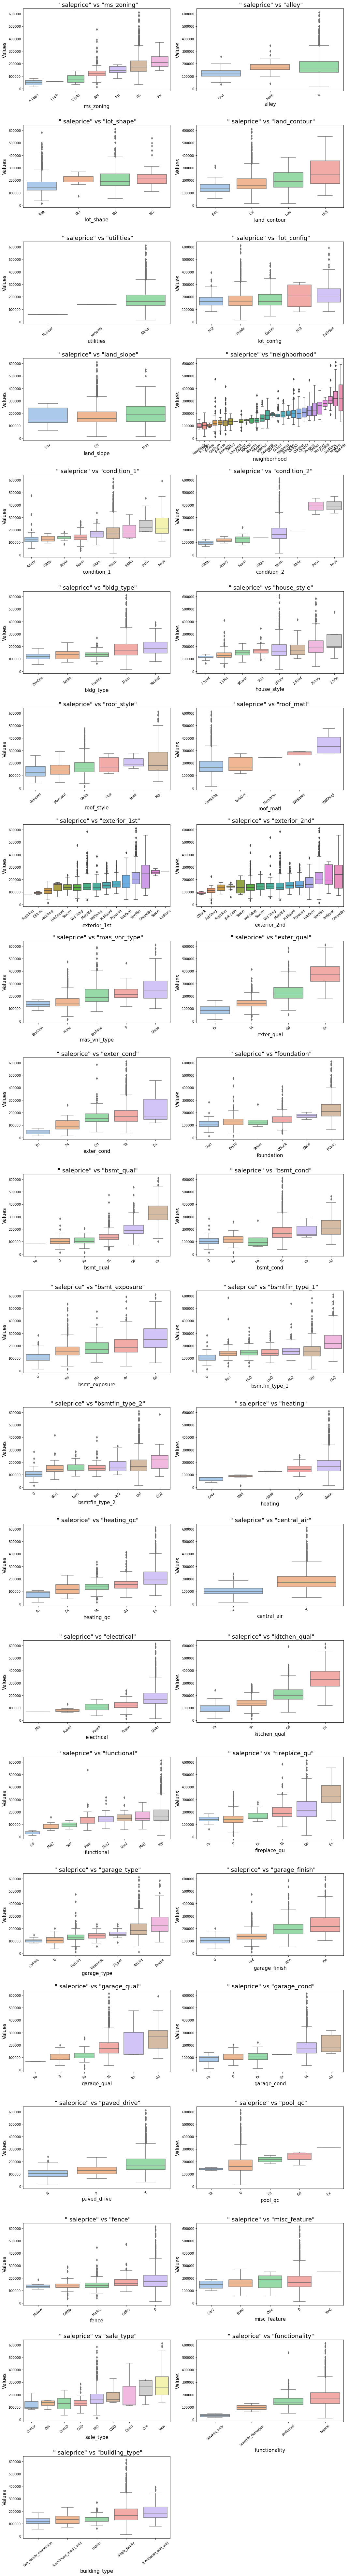

In [36]:
#applying the function on non-dummies DF
columns = train.select_dtypes(include = 'object').columns
boxplots(train, columns)

By and large, most of the categorial variables seem to have a linear relationship with saleprice. Therefore, we will keep them for further investigation.

In [37]:
#Land Slope and Lot config don't seem to affect sales price, so we can drop these 2 from the DFs
train.drop(['lot_config','land_slope'], axis =1, inplace=True)
test.drop(['lot_config','land_slope'], axis =1, inplace=True)

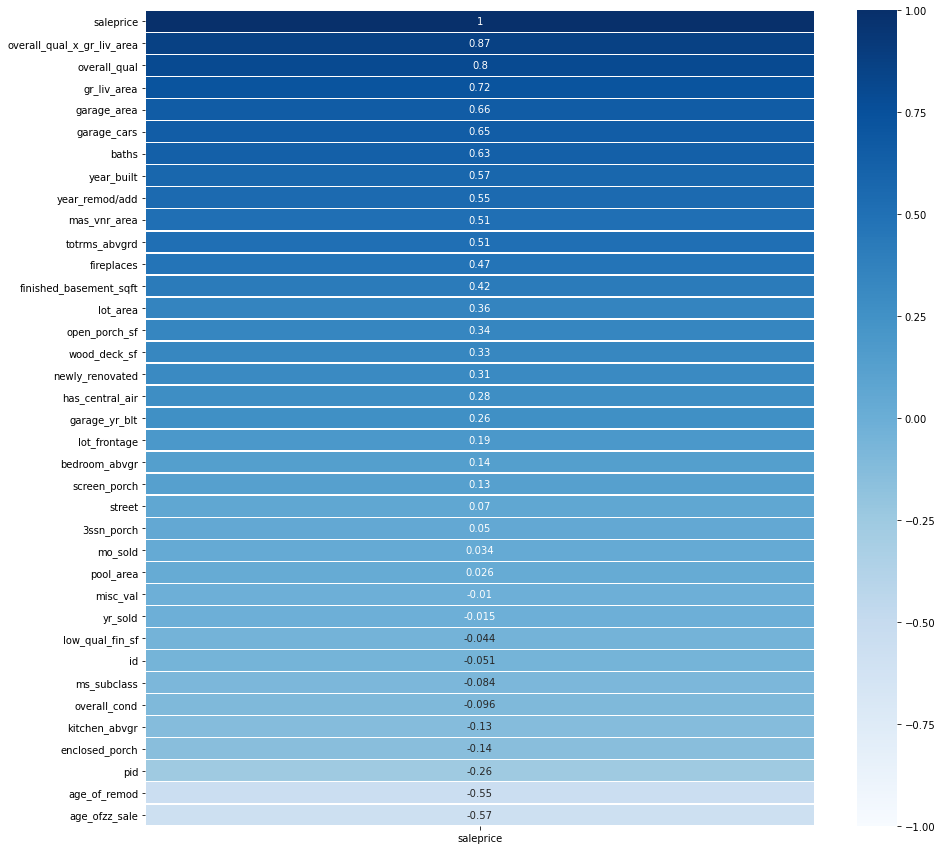

In [38]:
#correlation heatmap with just the saleprice column - within numerical DF
plt.figure(figsize = (15,15))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [39]:
#masking all of the columns in the correlation matrix that are +- .1 of 0
mask =abs(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False))<.1

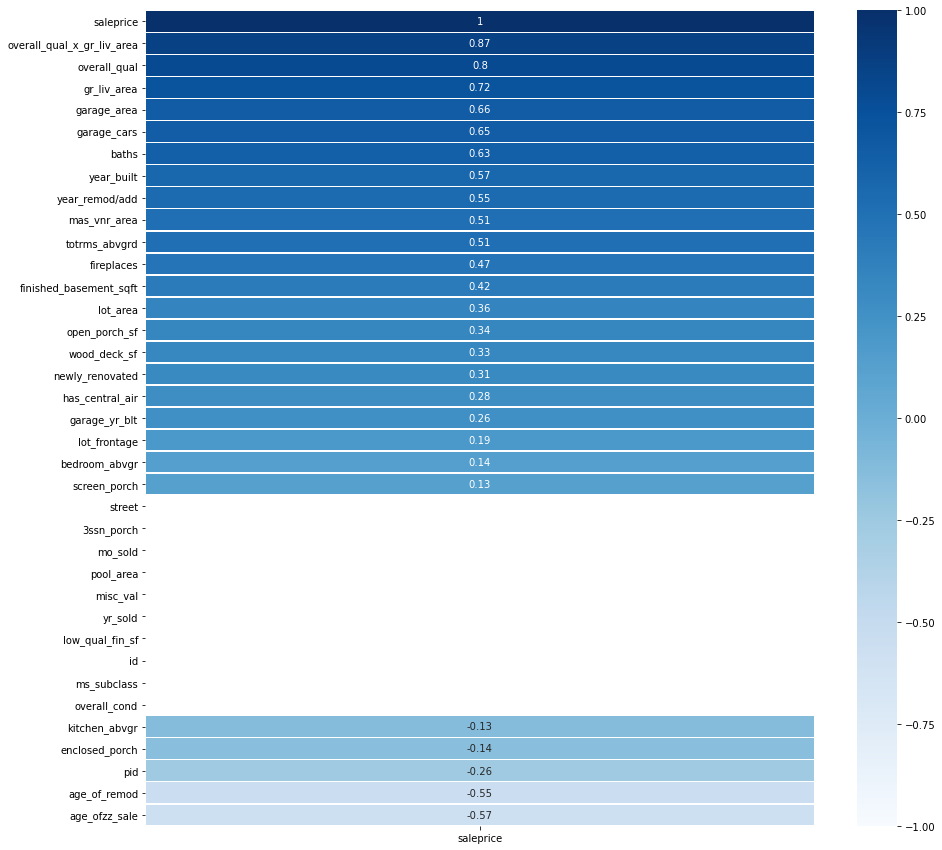

In [40]:
#masking values with low correlation
plt.figure(figsize=(15,15))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False),mask=mask,annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [41]:
#selecting columns with positive correlation more than 0.15
numerical_correlated_features = (train.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:25]).index.tolist()
# numerical_correlated_features

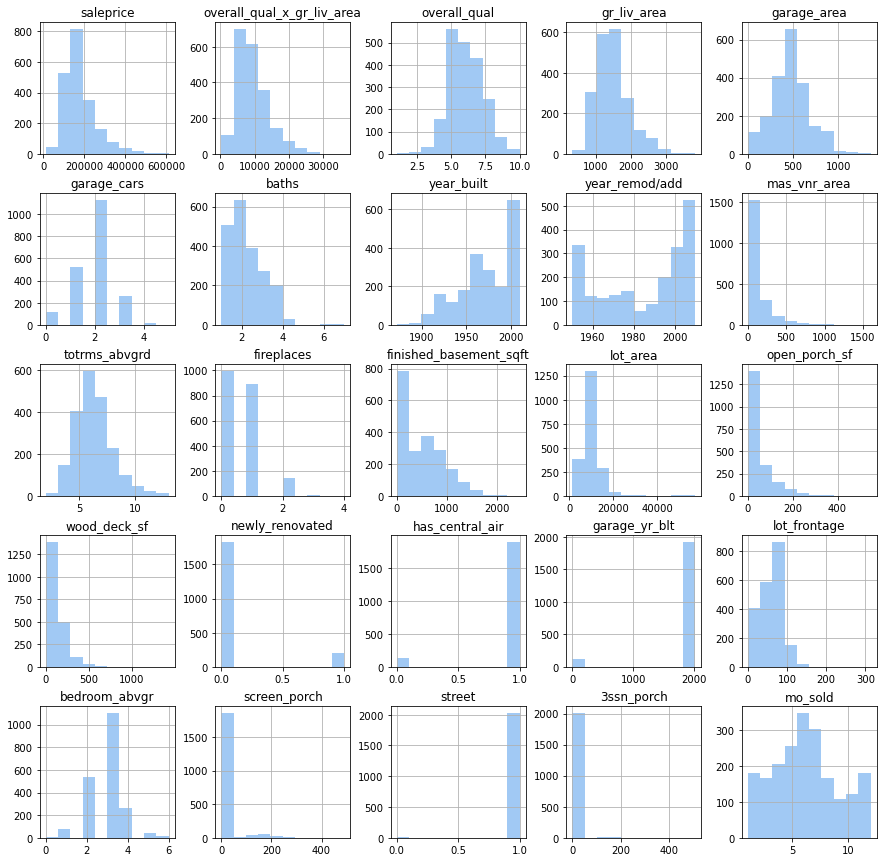

In [42]:
#plot histograms of the correlated features
train_dummies[numerical_correlated_features].hist(figsize=(15,15));

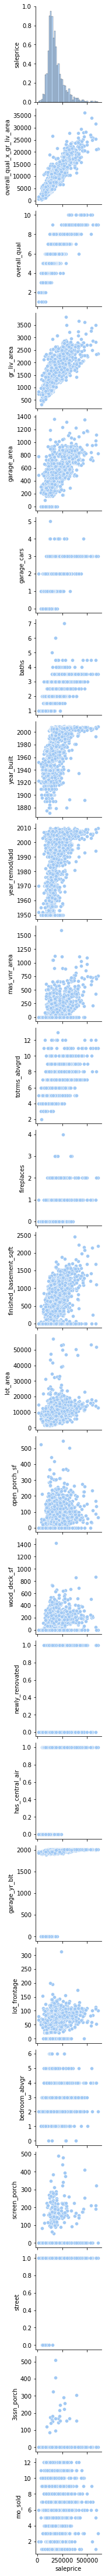

In [43]:
#plotting scatterplots of correlated features
sns.pairplot(train, y_vars=numerical_correlated_features, x_vars=['saleprice']);

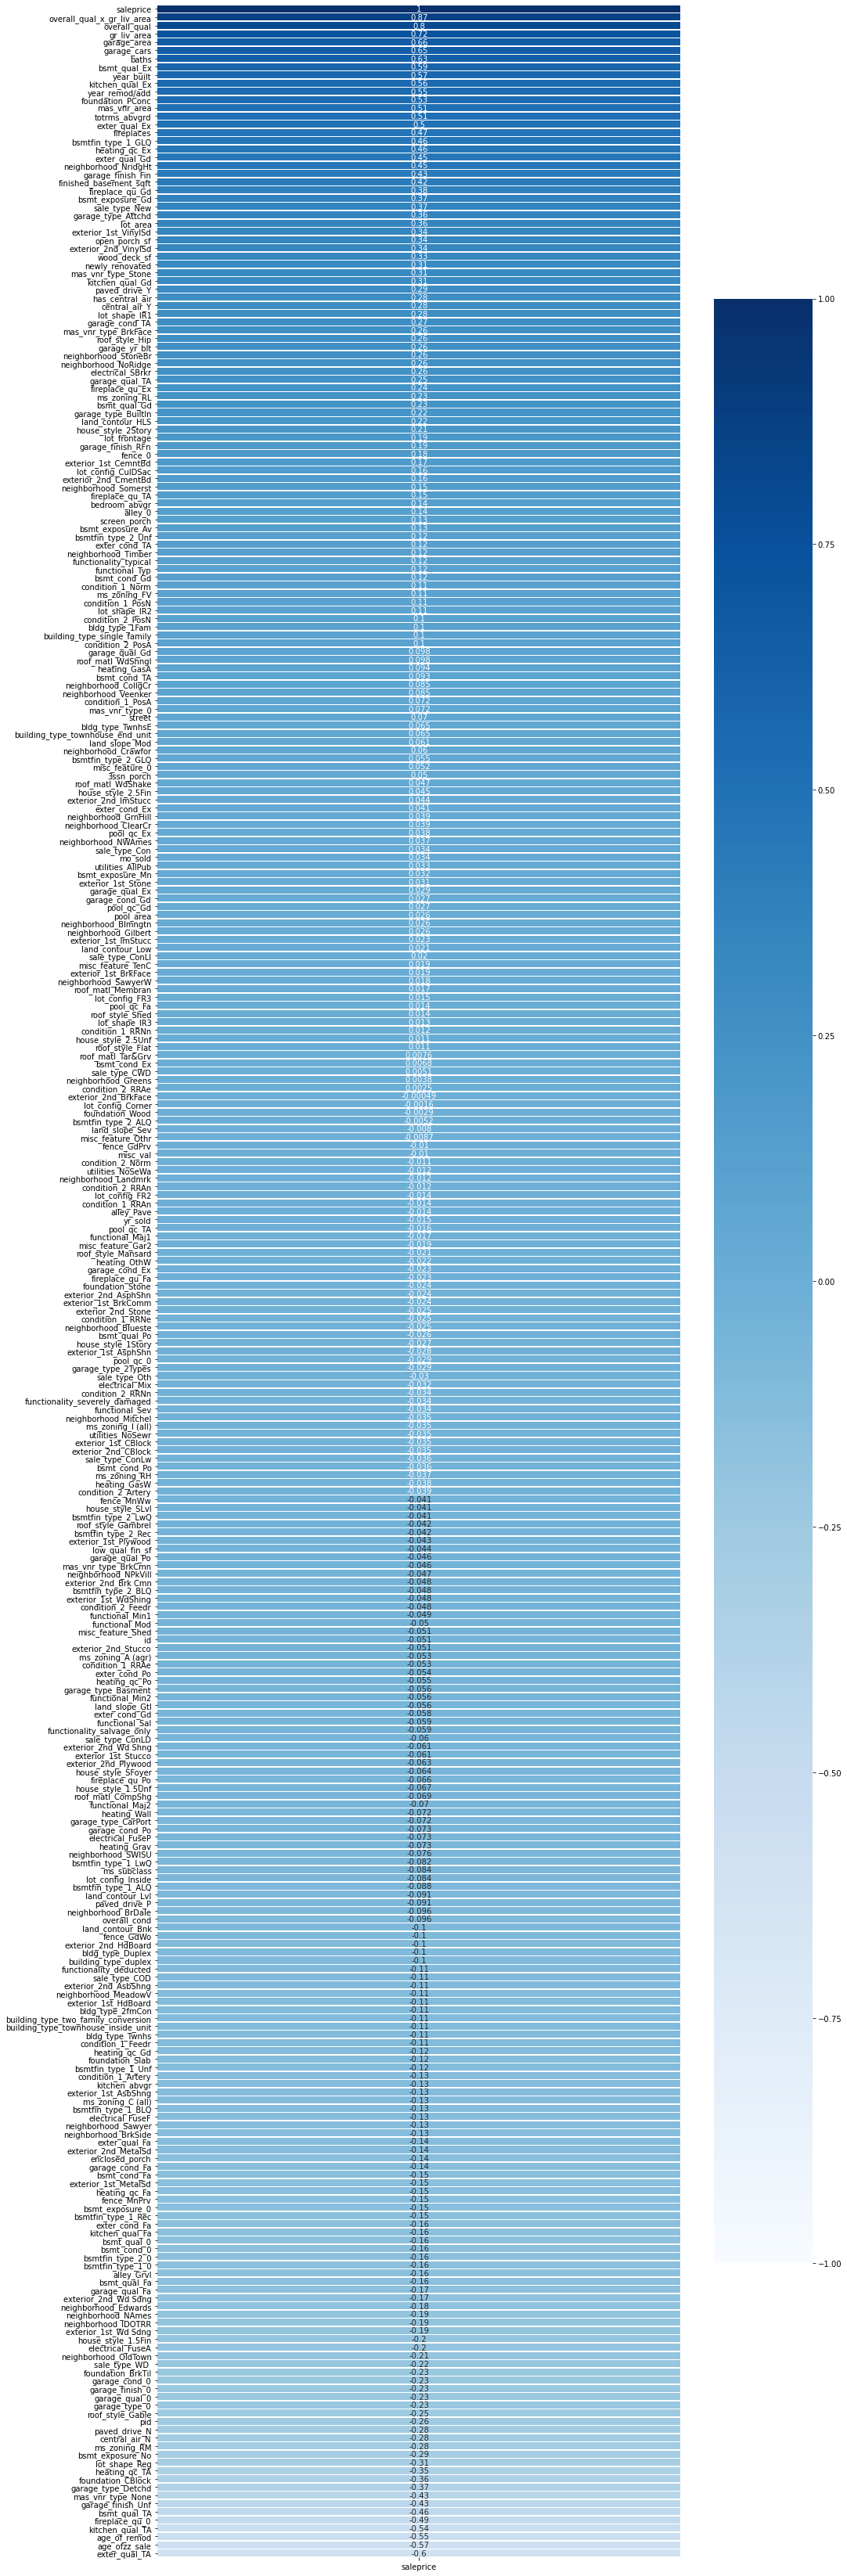

In [44]:
#correlation heatmap with just the saleprice column - within dummies DF
plt.figure(figsize = (15,60))
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [45]:
#masking all of the columns in the correlation matrix that are +- .1 of 0
mask =abs(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False))<.1

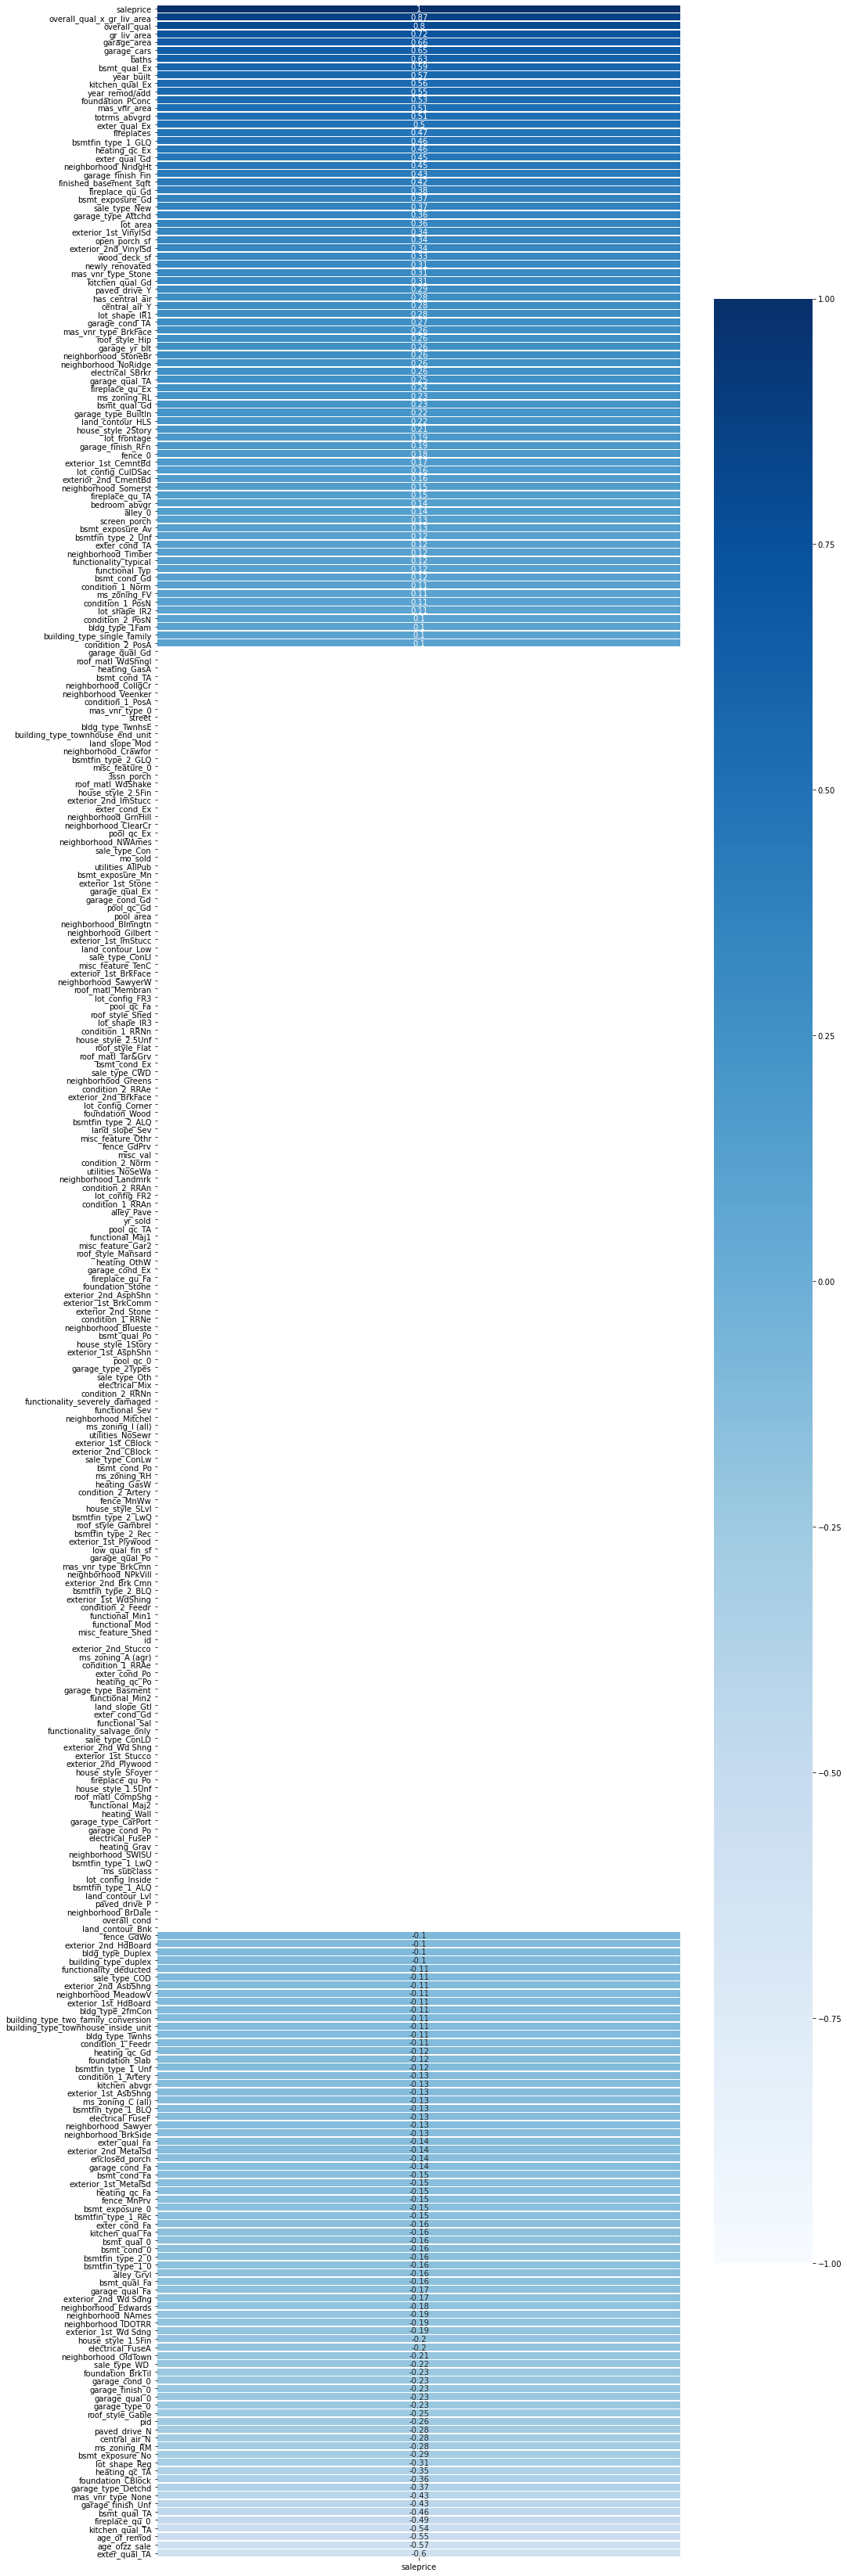

In [46]:
#masking values with low correlation
plt.figure(figsize=(15,60))
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False),mask=mask,annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [47]:
#selecting columns with positive correlation more than 0.15
correlated_features = (train_dummies.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:55]).index.tolist()
# correlated_features

In [48]:
#removing any duplicates and merging for first draft feature list
correlated_features = list(set(correlated_features + numerical_correlated_features))
# correlated_features

In [49]:
len(correlated_features)

60

The scatterplots confirm the correlation heatmap findings, in that the features appear to show positive correlation.

As there are quite a few categorical features, we need to plot boxplots to visualize better.

In [50]:
#finding categorical features from this list 

categorical_features = []
for x in correlated_features:
    if x.islower() == False:
        categorical_features.append(x)
        
# categorical_features

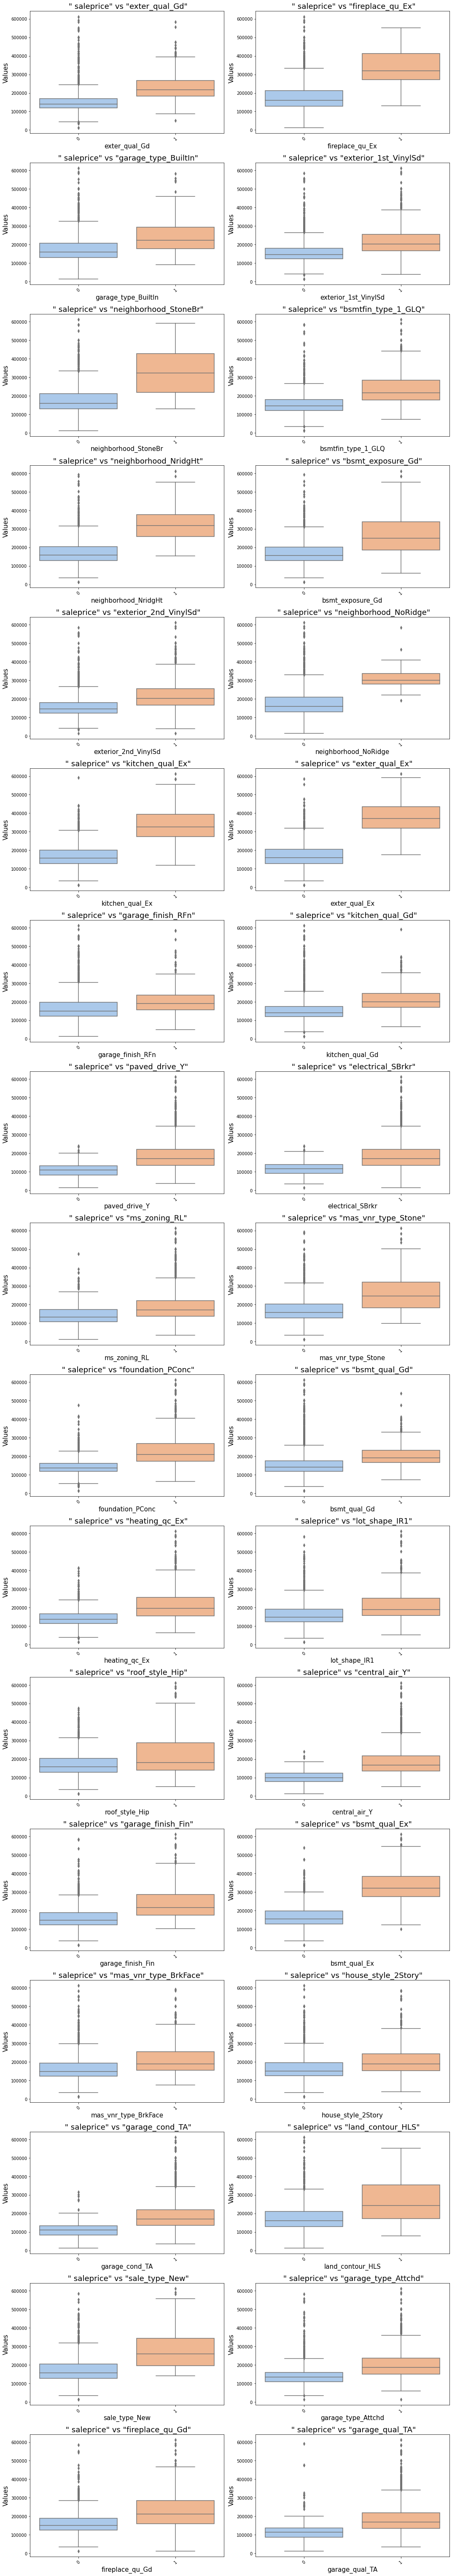

In [51]:
#plotting via previously used function
boxplots(train_dummies, categorical_features)

Through these boxplots, we can confirm the linear relationship of saleprice and these categorical features (using get dummies function). There are no features to be dropped at this stage.

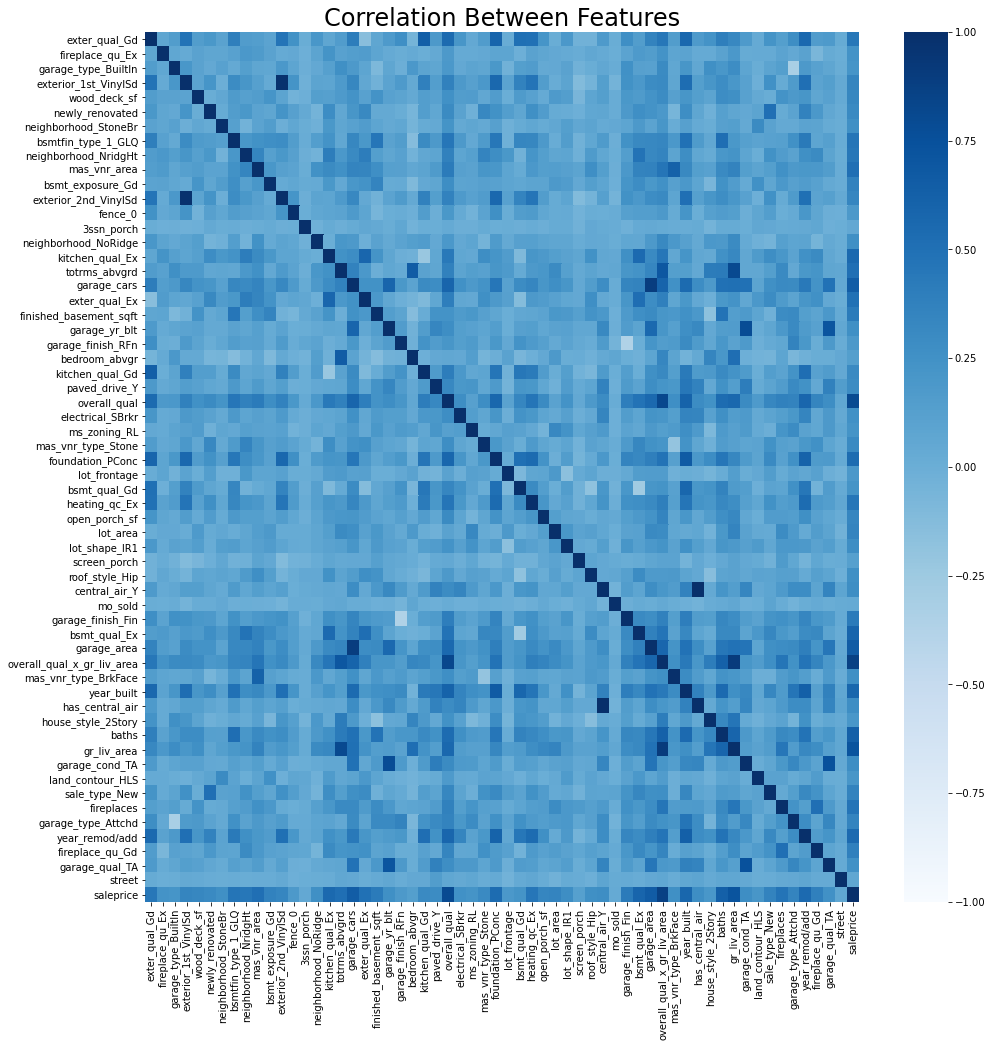

In [52]:
#plotting correlation b/w features 
plt.figure(figsize=(16, 16))
sns.heatmap(train_dummies[correlated_features].corr(),
           cmap='Blues',
           vmin=-1)
plt.title("Correlation Between Features", fontsize=24);

As there is some collinearity observed in features, notably between 
1) Garage cars and Garage area  
2) Total rooms above grade and above grade living area  
  
We will use Ridge/Lasso regression to apply a penalty to the coefficients.

I decided to create an interaction feature - which amplifies signal for selected categorial variables (above 0.5 correlation) with sale price to reflect better in linear regression

In [53]:
#calling the function to confirm amplification
amplified = amplify_feature(categorical_features)
# amplified

In [54]:
#remove un-amplified categorical features and add in new ones to feature list
new_list = []
for i in correlated_features:
    if i in categorical_features:
        correlated_features.remove(i)      

In [55]:
correlated_features_without_amplify = [item for item in correlated_features if item not in categorical_features]
new_correlated_features = correlated_features_without_amplify + amplified
# new_correlated_features

In [56]:
len(new_correlated_features)

60

In [57]:
#preliminary feature set
features = [col for col in new_correlated_features if col != 'saleprice']
len(features)

59

In [58]:
X = train_dummies[features]
y = train_dummies['saleprice']

## 4.Data Modelling

###  Train, Validation split

In [59]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [60]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)

### Instantiate Models

In [61]:
lr = LinearRegression()
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
lasso = LassoCV(n_alphas=200)
enet = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005))

### Getting Cross Validation Estimates

In [62]:
#LR estimate test r2 using cross val
lr_cv_score = cross_val_score(lr, X_train_scaled, y_train, cv = 5).mean()
lr_cv_score

0.910357631976737

In [63]:
#LR estimate test RMSE using cross val
lr_cv_score_RMSE = -cross_val_score(lr, X_train_scaled, y_train, cv = 5, scoring= 'neg_root_mean_squared_error').mean()
lr_cv_score_RMSE

23514.189076235663

In [64]:
#Ridge estimate r2
ridge_cv_score = cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean()
ridge_cv_score

0.9106463964774403

In [65]:
#ridge estimate adjusted R2
ridge_cv_score_adj_r_squared = 1 - (1 - ridge_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
ridge_cv_score_adj_r_squared

0.9079865263423086

In [66]:
#Ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23479.64196929607

In [67]:
#Lasso estimate r2
lasso_cv_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()
lasso_cv_score

0.9118900125308735

In [68]:
#lasso estimate adjusted R2
lasso_cv_score_adj_r_squared = 1 - (1 - lasso_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
lasso_cv_score_adj_r_squared

0.9092671622479883

In [69]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

23342.18140130578

In [70]:
#ElasticNet estimate r2
enet_cv_score = cross_val_score(enet, X_train_scaled, y_train, cv=5).mean()
enet_cv_score

0.9049280596914138

In [71]:
#lasso estimate adjusted R2
enet_cv_score_adj_r_squared = 1 - (1 - enet_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
enet_cv_score_adj_r_squared

0.9020979666146194

In [72]:
#Elasticnet estimate RMSE
enet_RMSE_score = -cross_val_score(enet, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
enet_RMSE_score

24335.273413627634

### Model Fitting and Evaluation 
#### Linear Regression

In [73]:
lr.fit(X_train_scaled,y_train)

print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (LR)" + str((lr_cv_score_RMSE)))

Training RMSE(LR) 22172.80172482
Testing RMSE(LR) 21711.815523922596
Estimate of Testing RMSE (LR)23514.189076235663


#### Ridge

In [74]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [75]:
ridge.alpha_

1.6

In [76]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 22094.877072416446
Testing RMSE(Ridge) 21910.95483898089
Estimate of Testing RMSE (Ridge) 23479.64196929607


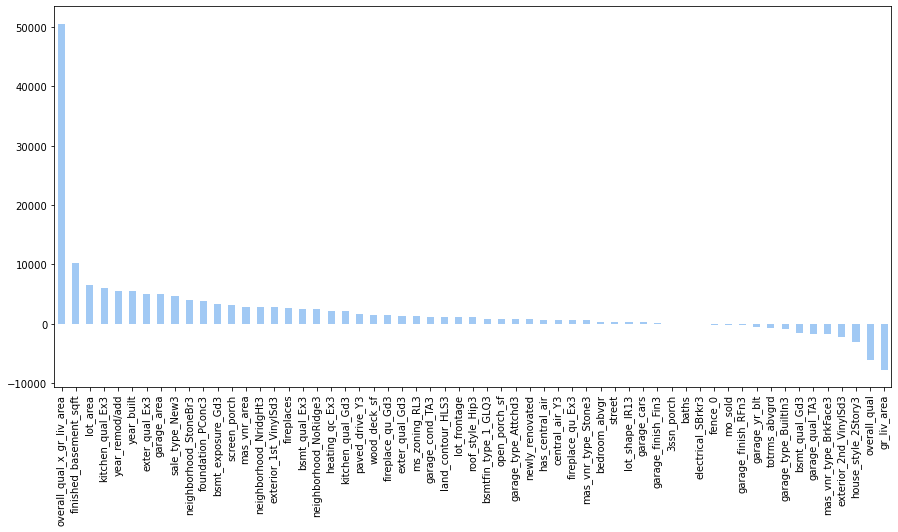

In [77]:
#to see how the coefficients have been regularized in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

#### Lasso

In [78]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [79]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 22261.385942138648
Testing RMSE(Lasso) 22156.318355914285
Estimate of Testing RMSE (Lasso)23342.18140130578


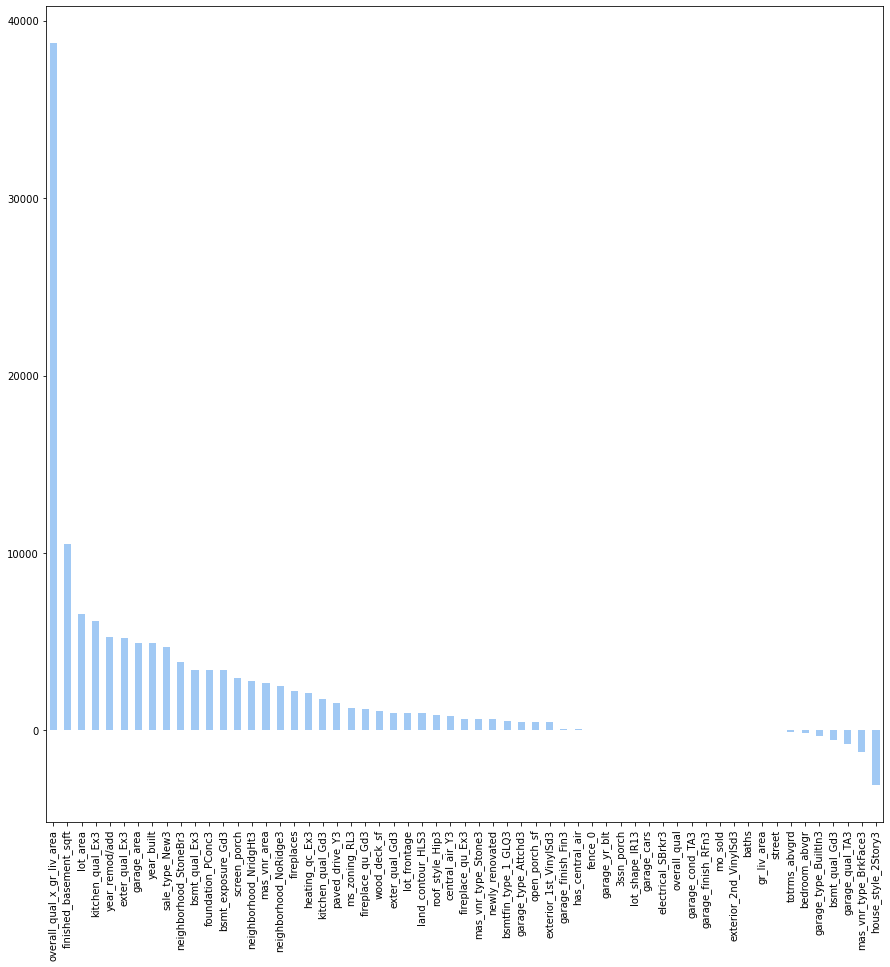

In [80]:
#to see how the coefficients have been regularized in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 15));

Using Lasso coefficient penalties (visualized as above) to enable further feature selection, I have decided to remove some features which have been negated.


In [81]:
lasso_feat_drop = pd.Series(lasso.coef_, index=features).sort_values(ascending = True)
# lasso_feat_drop

In [82]:
#removing all features that have are below 750 coefficient in lasso
features = pd.Series(lasso.coef_, index=features).sort_values(ascending = True).where(lambda x : x>750).dropna().index.tolist()
# features

In [83]:
#confirming length of revised feature list
len(features)

29

In order to balance bias and variance, I manually set the penalty at 750. This reduced the number of features in the model to just 28. The train and test scores show that this model is currently slightly overfitting. With this feature regularization, it should be more balanced.

### Final Model Selection - after dropping some features

In [84]:
X = train_dummies[features]
y = train_dummies['saleprice']

In [85]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [86]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)

In [87]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [88]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [89]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [90]:
enet.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995]))

In [91]:
ridge.alpha_

10.0

In [92]:
lasso.alpha_

71.76384276975018

In [93]:
enet.alpha_

0.5

In [94]:
#ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23343.009483115835

In [95]:
#LR estimate RMSE
lr_RMSE_score = -cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lr_RMSE_score

23347.06758584492

In [96]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

23338.122148285875

In [97]:
#Elasticnet estimate RMSE
enet_RMSE_score = -cross_val_score(enet, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
enet_RMSE_score

24456.472703880085

In [98]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 22591.53025052055
Testing RMSE(Ridge) 22582.583778372176
Estimate of Testing RMSE (Ridge) 23343.009483115835


In [99]:
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (LR) " + str((lr_RMSE_score)))

Training RMSE(LR) 22588.602551436383
Testing RMSE(LR) 22565.468519461472
Estimate of Testing RMSE (LR) 23347.06758584492


In [100]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 22589.64461724612
Testing RMSE(Lasso) 22564.541569296616
Estimate of Testing RMSE (Lasso)23338.122148285875


In [101]:
print("Training RMSE(Enet) " + str(np.sqrt(mean_squared_error(y_train, enet.predict(X_train_scaled)))))
print("Testing RMSE(Enet) " + str(np.sqrt(mean_squared_error(y_validate,enet.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (Enet)" + str((enet_RMSE_score)))

Training RMSE(Enet) 23888.09735624576
Testing RMSE(Enet) 24056.049195483356
Estimate of Testing RMSE (Enet)24456.472703880085


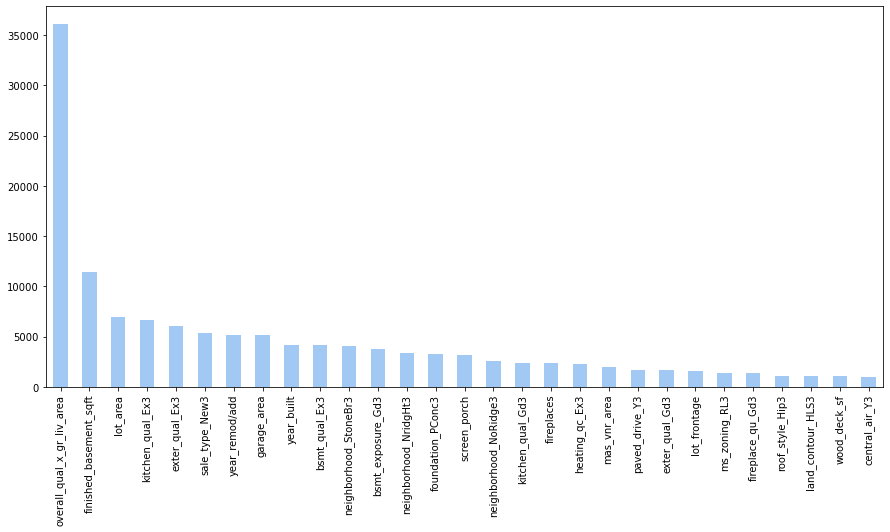

In [102]:
#to see how the final model coefficients have been regularized in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

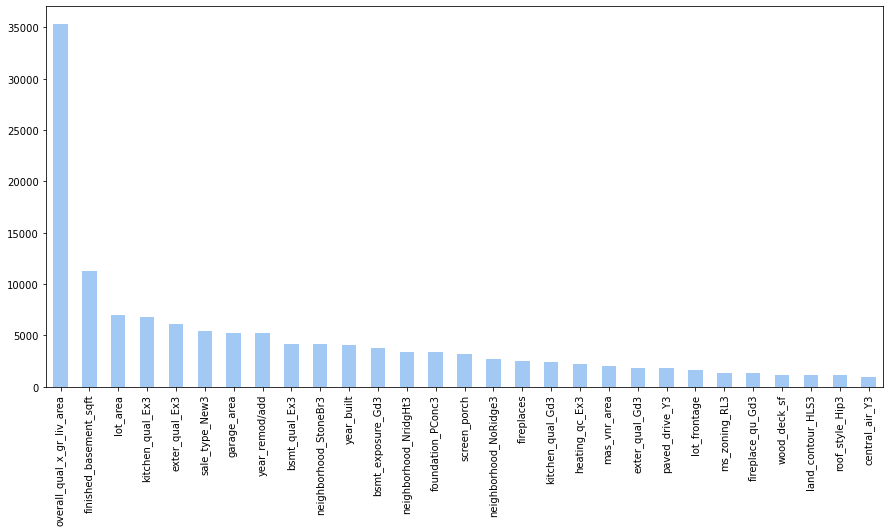

In [103]:
#to see how the final model coefficients have been regularized in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

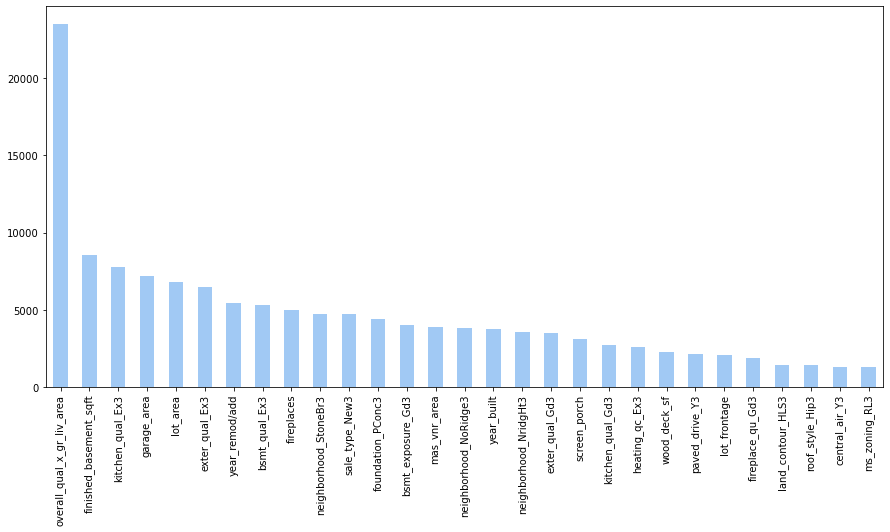

In [104]:
#to see how the final model coefficients have been regularized in elasticnet
pd.Series(enet.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

With an estimated mean squared error on sale price of under $24,000, I am confident to proceed with Ridge as the final model and feel it has reasonably low bias and variance after several iterations. Additionally, it does not seem to be over/underfit.  

### Generating and using Optimal Alpha

In [105]:
r_alphas = np.logspace(0, 50, 100)
# Generates 100 values equally between 0 and 50,

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='neg_root_mean_squared_error', cv=5)

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train_scaled, y_train)

In [106]:
#ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23339.34802776633

In [107]:
#ridge estimate R2
ridge_r2_score = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5).mean()
ridge_r2_score

0.9120050247186302

In [108]:
#ridge estimate adjusted R2
adj_r_squared = 1 - (1 - ridge_r2_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
adj_r_squared

0.9107367074804793

In [109]:
print("Training RMSE(Ridge w/optimal alpha) " + str(np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_scaled)))))
print("Testing RMSE(Ridge w/optimal alpha) " + str(np.sqrt(mean_squared_error(y_validate,ridge_model.predict(X_validate_scaled)))))
print("Estimate of Testing RMSE (Ridgew/optimal alpha) " + str((ridge_RMSE_score)))

Training RMSE(Ridge w/optimal alpha) 22591.666089995782
Testing RMSE(Ridge w/optimal alpha) 22583.04141682003
Estimate of Testing RMSE (Ridgew/optimal alpha) 23339.34802776633


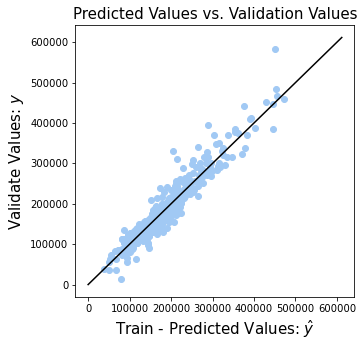

In [110]:
#Testing how this model might look like on validation set

y_pred_ridge = ridge_model.predict(X_validate_scaled)

# Plot the model
plt.figure(figsize=(5,5))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_ridge, y_validate)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Train - Predicted Values: $\hat{y}$", fontsize = 15)
plt.ylabel("Validate Values: $y$", fontsize = 15)
plt.title('Predicted Values vs. Validation Values', fontsize = 15);

It seems that the model is good at predicting mid-range values for houses, but falters slightly at higher values.

In [111]:
residuals_ridge = y_validate - y_pred_ridge

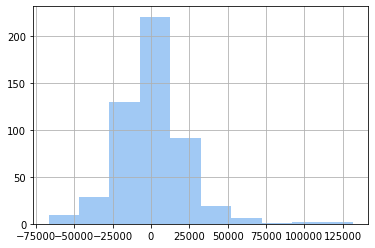

In [112]:
residuals_ridge.hist();

From the above histogram, it is evident that the residuals are not normally distributed. On both tails of the distribution, there are some residuals that indicate that the model's prediction was incorrect by quite a bit.

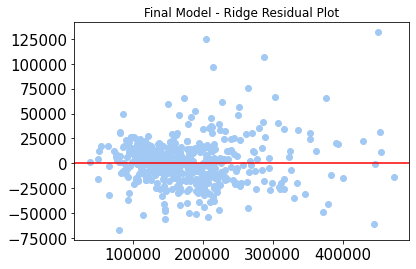

In [113]:
plt.scatter(y_pred_ridge, residuals_ridge);
plt.axhline(0, color='r');
plt.title("Final Model - Ridge Residual Plot");
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

The disparity at higher end of prices is further amplified by this plot. The residuals increase at the more extreme predicted values.  

This model is able to account for approximately 91% of the variation in Sale Price of a property (adjusted R2 score) and is able to predict the Sales Price within $24,000. 

Further exploration of the residuals of this model revealed that it is not as accurate at predicting higher values. Perhaps a non-linear model will be a better fit to lower the bias at the higher end of price.

An interesting duality in this the model is the interaction feature of quality and living area. While it makes the model more accurate, it may not be as useful to answer the problem statement. From the perspective of users of this data (sellers) - it is easier to increase the overall quality of the house (with better materials etc), rather than increase the living area.

### Predictions on Kaggle DF and Export

In [114]:
X_kaggle = test_dummies[features]
X_train = train_dummies[features]

In [115]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_kaggle_scaled = ss.transform(X_kaggle)

In [116]:
test_predictions = ridge_model.predict(X_kaggle_scaled)
submit_df = pd.DataFrame(test['id'])
submit_df['saleprice'] = test_predictions

In [117]:
submit_df.rename(columns={"id": "Id", "saleprice": "SalePrice"})

Id      SalePrice
0    2658  137152.593883
1    2718  149188.839012
2    2414  234910.555822
3    1989  103830.330810
4     625  168875.385630
..    ...            ...
873  1662  187444.873508
874  1234  215897.586179
875  1373  140227.752193
876  1672  120631.180840
877  1939  125931.523165

[878 rows x 2 columns]

In [118]:
submit_df.to_csv('../datasets/final_predictions.csv', index=False)

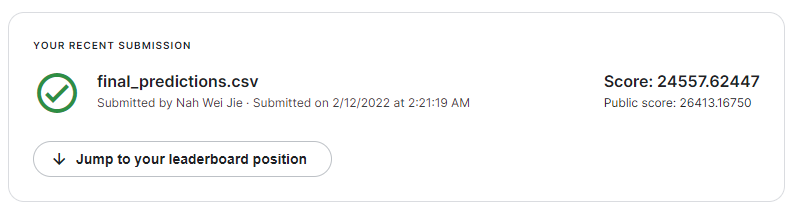

This model has an RMSE score of 24557 on Kaggle, thus I am happy to proceed as the final output.

### 5.Conclusions and Recommendations

In [119]:
#top coefficients as per this model
pd.Series(ridge.coef_, index=features).sort_values(ascending = False)

overall_qual_x_gr_liv_area    35292.462291
finished_basement_sqft        11308.618639
lot_area                       6964.636429
kitchen_qual_Ex3               6808.022352
exter_qual_Ex3                 6104.373549
sale_type_New3                 5385.419446
garage_area                    5225.568410
year_remod/add                 5203.524185
bsmt_qual_Ex3                  4211.705075
neighborhood_StoneBr3          4208.267459
year_built                     4043.423839
bsmt_exposure_Gd3              3746.145623
neighborhood_NridgHt3          3409.039331
foundation_PConc3              3360.449824
screen_porch                   3191.665864
neighborhood_NoRidge3          2748.362612
fireplaces                     2540.974487
kitchen_qual_Gd3               2461.401288
heating_qc_Ex3                 2250.289739
mas_vnr_area                   2045.219786
exter_qual_Gd3                 1829.767230
paved_drive_Y3                 1784.546687
lot_frontage                   1681.283121
ms_zoning_R

1. Out of all regressors, the factors that affect salesprice the most is the the size/quality factor.
    - ie. Big and quality houses will fetch a disproportionally higher premiums than small/poor-quality houses.
    - This also means that individually, having a big house or a good quality house itself will not bring in the premiums.
    - Business Evaluation: This shows us that if we purchase a big house of poor quality, and renovate it such that the quality improves, this will fetch us a much higher profit from the house.
2. Second to the size/quality factor is the quality factor of the house. 
    - Houseage, which is indicative of the quality of the house, is highly correlated to the saleprice of the house. 
    - However, it is possible to offset this negative factor by introducing more positive factors to our house, ie. renovations, material changes, quality improvements etc.
3. Neighbourhood moderately impact the saleprice of houses. 
    - Prime neighbourhoods appear to be NridgeHt, StoneBr, Crawfor and Somerst in descending order (NridgeHt is the most premium). 
4. There are a few materials that are preferred over others. However, tweaking other factors (mentioned above) will bring a higher saleprice.
    - Masvnrtype = Stone is preferred. 
    - Roofstyle = "Hip" is preferred over Roofstyle = "Mansard"

### Limitations

Although our model seems to do well, it might not be able to come up with accurate predictions for properties in other cities as data fed into the model is only belonging to that of Ames, which by and large is a good representation of the tastes and preferences unique to Ames.  

Secondly, the time period of 2006-2010 is when the US subprime crisis occurred, which may have caused price fluctations which were captured by our analysis of sale price against year sold.

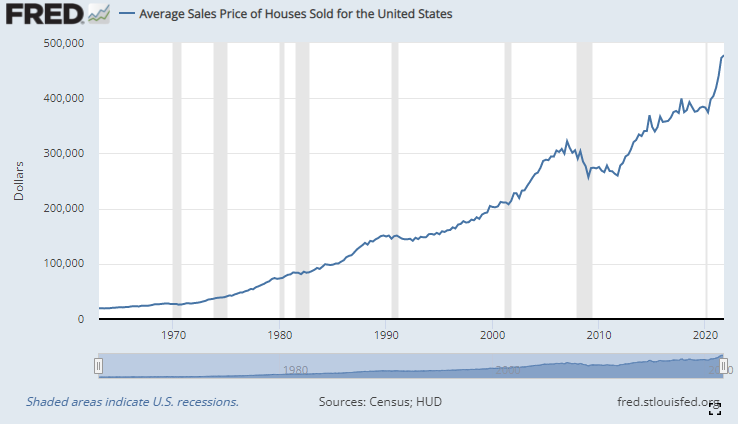   
According to the [graph above](https://fred.stlouisfed.org/series/ASPUS), we can see that the housing prices in US have been steadily increasing year on year right up till the cusp of the US subprime crisis, which did not experience recovery until Q3 2013.

Below are the items listed which I feel may improved the performance of our model if we had access to:

1. House transaction data were collected over four years, from 2006 to 2010, based on 'yrsold' data from our train model. 
    - As we are working towards expanding our presence in the Ames, Iowa region in year 2022, the data collected is deemed to be outdated for present day modelling. Many factors would have changed post-2010, including neighbourhood amenities changes, demographic changes, taste & preferences of consumers etc. 
    - Data showed that 2010 house sales have dipped in numbers compared to all other years. However, we do not have data for 2010-onwards. A systematic shock to the economy may cause house prices to be depressed for a long time, and we do not know how it has affected current sale prices as a result of this crisis. 
2. Data Requests - Some other details that would be helpful for our analysis would be:
    - Transportation facilities nearby: Number of Buses in 500m vicinity, Distance to nearest train station
    - At least 10 years of transaction data
    - Demographic group of each neighbourhood and each building type (in a seperate dataframe)

### Circling back to our problem statement - recommendations on where the firm can focus its efforts in a bid to increase revenue.

Based on the current model, insights about the contribution of specific features to Sale Price can be derived from the analysis. 

Given that it will be unlikely or extremely difficult to increase any continuous variables (such as lot frontage or square footage), I have decided to base recommendations mostly on categorial variables as these can be changed before a flip.

1. The key to a successful flipping strategy is to buy-low and sell-high. Hence, finding a good house at a low price is essential in this strategy.
2. A key to success is also the size of the house. 
    - Our model suggest that houses that are big and extremely poor in quality will depress prices by a significant amount. Hence, buying them at a low price is plausible. This also suggest that the strategy of renovations will work well based on our model prediction.
    - Preferably, find a house that has a garage and basement. These are elements of houses that lift prices. 
3. We should be really mindful in the materials chosen for our renovation work.
    - A foundation material of Poured Contrete alongside a large houses (masonry/lotarea) is highly preferred by buyers.
    - General preference hip-styled roof than mansard-styled roof. However, renovations for rooftops often come with a heavy price tag, hence we need to weigh the trade-offs and see if it is still worth it.